In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='kcBR14_NqTmdFtQlfKj8ZyBvaM6rDh_OK5RuQ8tng1rh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'newproject-donotdelete-pr-hbgeifgektjysh'
object_key = 'Admission_Predict.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


In [72]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [73]:
data.shape

(400, 8)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [75]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
Null=data.isnull()
Null.sum()

In [ ]:
data.duplicated().sum()

In [ ]:
data.drop('Serial No.', axis='columns', inplace=True)
data.head()

In [ ]:
sns.displot(x=data["GRE Score"], kde=True, color='darkblue')
plt.title("GRE score distribution with density distribution");

In [ ]:
sns.displot(x=data["TOEFL Score"], kde=True, color='olive')
plt.title("TOFEL score distribution with density distribution");

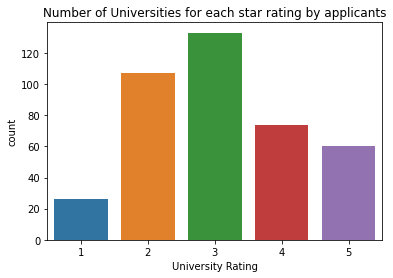

In [25]:
sns.countplot(x=data["University Rating"]);
plt.title("Number of Universities for each star rating by applicants");

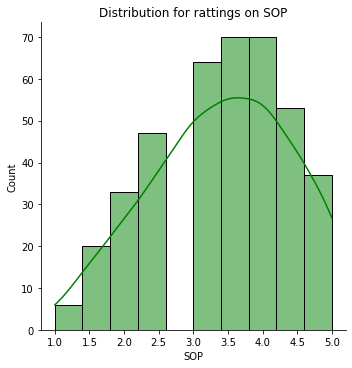

In [26]:
sns.displot(x=data["SOP"], kde=True, color='green');
plt.title("Distribution for rattings on SOP");

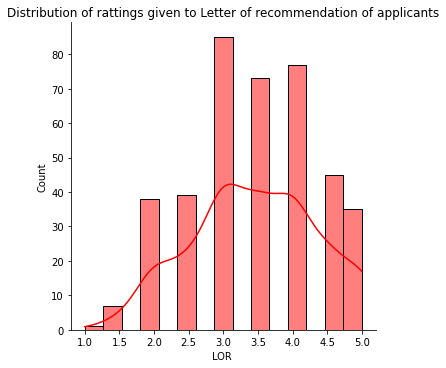

In [27]:
sns.displot(x=data["LOR "], kde=True, color='red');
plt.title("Distribution of rattings given to Letter of recommendation of applicants");

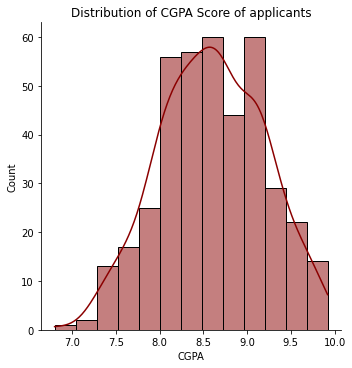

In [28]:
sns.displot(x=data["CGPA"], kde=True, color='darkred');
plt.title("Distribution of CGPA Score of applicants");

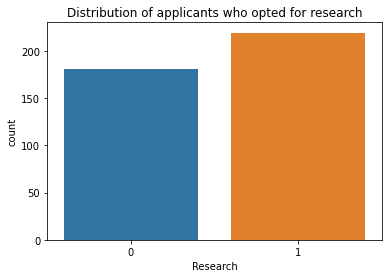

In [29]:
sns.countplot(x=data["Research"]);
plt.title("Distribution of applicants who opted for research");

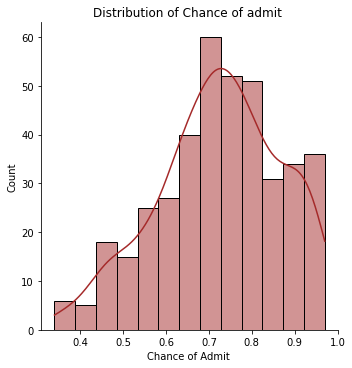

In [30]:
sns.displot(x=data["Chance of Admit "], kde=True, color='brown');
plt.title("Distribution of Chance of admit ");

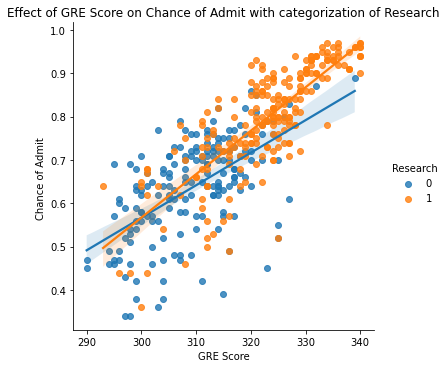

In [31]:
sns.lmplot(y="Chance of Admit ", x = "GRE Score", hue="Research", data=data);
plt.title("Effect of GRE Score on Chance of Admit with categorization of Research");

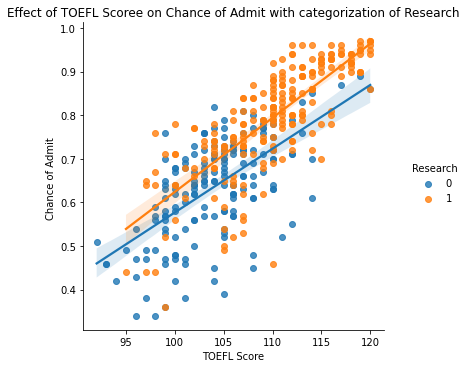

In [32]:
sns.lmplot(y="Chance of Admit ", x = "TOEFL Score", hue="Research", data=data);
plt.title("Effect of TOEFL Scoree on Chance of Admit with categorization of Research");

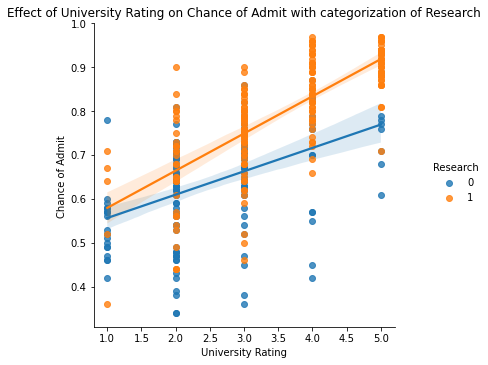

In [33]:
sns.lmplot(y="Chance of Admit ", x = "University Rating", hue="Research", data=data);
plt.title("Effect of University Rating on Chance of Admit with categorization of Research");

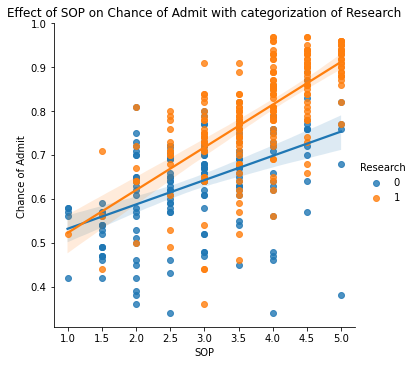

In [34]:
sns.lmplot(y="Chance of Admit ", x = "SOP", hue="Research", data=data);
plt.title("Effect of SOP on Chance of Admit with categorization of Research");

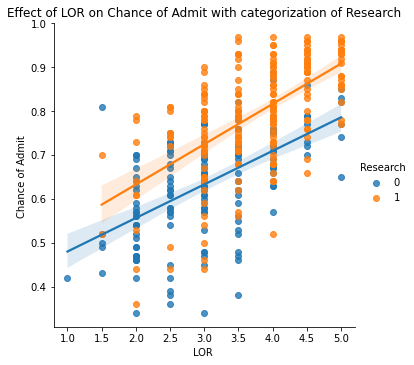

In [35]:
sns.lmplot(y="Chance of Admit ", x = "LOR ", hue="Research", data=data);
plt.title("Effect of LOR on Chance of Admit with categorization of Research");

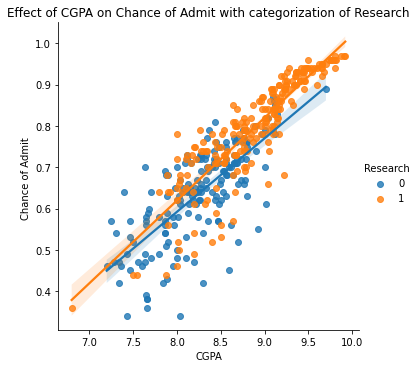

In [36]:
sns.lmplot(y="Chance of Admit ", x = "CGPA", hue="Research", data=data);
plt.title("Effect of CGPA on Chance of Admit with categorization of Research");

In [37]:
data = data.reset_index(drop=True)

In [38]:
X = data[data.columns.drop('Chance of Admit ')]
y = data["Chance of Admit "]

In [39]:
X.shape

(400, 7)

In [40]:
y.shape

(400,)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [42]:
X_train.shape

(320, 7)

In [43]:
X_test.shape

(80, 7)

In [44]:
#model
linear_regression = LinearRegression()
#training
linear_regression.fit(X_train, y_train)

LinearRegression()

In [45]:
model = LinearRegression(normalize=True)
model.fit(X_test, y_test)
# model.score(X_test, y_test)
print ("Accuracy : ",model.score(X_test, y_test)*100)
methodDict = {}
methodDict['Linear Regression'] = model.score(X_test, y_test)*100

Accuracy :  80.72164388568929


In [46]:
from sklearn.ensemble import RandomForestRegressor
rgr=RandomForestRegressor()
rgr.fit(X_train,y_train)

RandomForestRegressor()

In [47]:
print ("Accuracy : ",rgr.score(X_test, y_test)*100)
methodDict['Random Forest'] = rgr.score(X_test, y_test)*100

Accuracy :  73.21905063227847


In [48]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import xgboost as xgb
xg = xgb.XGBRegressor()
xg.fit(X_train,y_train)

In [ ]:
print ("Accuracy : ",xg.score(X_test, y_test)*100)
methodDict['XG Boost'] = xg.score(X_test, y_test)*100

In [ ]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([0, 100.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')
     
    plt.show()

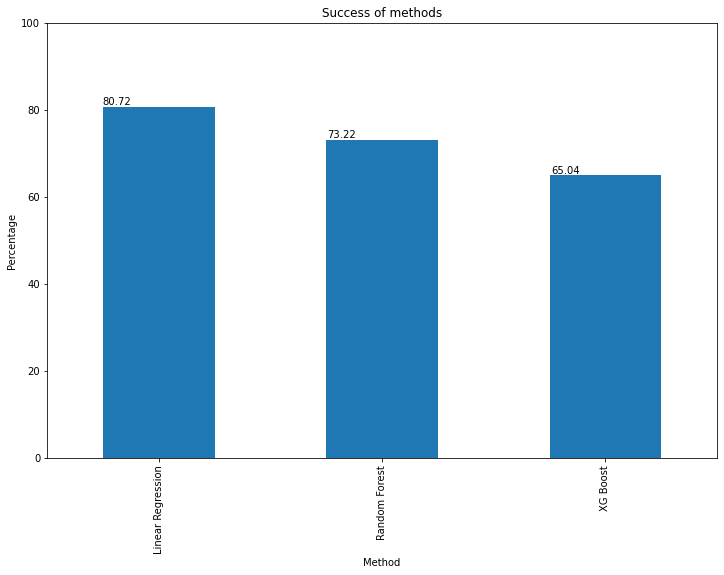

In [76]:
plotSuccess()

In [77]:
print('The chance of you getting an admit in the US is {}%'.format(round(model.predict([[330, 115, 5, 4.5, 3, 9.34, 1]])[0]*100, 1)))

The chance of you getting an admit in the US is 88.1%


In [78]:
import pickle

In [79]:
#  Saving the model to the local file system
filename='final_model.pickle'
pickle.dump(linear_regression,open(filename,'wb'))

In [80]:
!pip install ibm_watson_machine_learning

In [81]:
from ibm_watson_machine_learning import APIClient
import json

In [82]:
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey" : "YXptRh7MuUVmneQk-4sC31DSfwIqjHGTXqjm0T3xdN-B"
    
}

In [83]:
wml_client = APIClient(wml_credentials)

In [85]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
26a5839b-9795-466e-b90d-64d5c64d5a25  models  2022-11-18T16:51:29.480Z
------------------------------------  ------  ------------------------


In [86]:
SPACE_ID="26a5839b-9795-466e-b90d-64d5c64d5a25"

In [87]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [88]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [89]:
import sklearn
sklearn.__version__

'1.0.2'

In [90]:
MODEL_NAME = 'admission predictor'
DEPLOYMENT_NAME = 'models'
DEMO_MODEL = rgr

In [91]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [92]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [94]:
model_details = wml_client.repository.store_model(
    model=DEMO_MODEL, 
    meta_props=model_props, 
    training_data=X_train, 
    training_target=y_train
)

In [95]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'Chance of Admit ',
  'schemas': {'input': [{'fields': [{'name': 'GRE Score', 'type': 'int64'},
      {'name': 'TOEFL Score', 'type': 'int64'},
      {'name': 'University Rating', 'type': 'int64'},
      {'name': 'SOP', 'type': 'float64'},
      {'name': 'LOR ', 'type': 'float64'},
      {'name': 'CGPA', 'type': 'float64'},
      {'name': 'Research', 'type': 'int64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': '12b83a17-24d8-5082-900f-0ab31fbfd3cb',
   'name': 'runtime-22.1-py3.9'},
  'type': 'scikit-learn_1.0'},
 'metadata': {'created_at': '2022-11-18T16:59:11.044Z',
  'id': '8a2fd19b-2682-47b7-84db-f3380e38cb4f',
  'modified_at': '2022-11-18T16:59:15.116Z',
  'name': 'admission predictor',
  'owner': 'IBMid-6610045559',
  'resource_key': '382ba85f-814e-47f2-b0ca-6ac645fe868e',
  'space_id': '26a5839b-9795-466e-b90d-64d5c64d5a25'},
 'system': {'warnings': []}}

In [96]:
model_id = wml_client.repository.get_model_id(model_details)
model_id

'8a2fd19b-2682-47b7-84db-f3380e38cb4f'